# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

# 3. Homework - work with your own data

In [17]:
import os
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

In [18]:
import os
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Step 1: Set your working directory
os.chdir(r"C:\Users\jalin\Documents\data\AILeader")
print("Working directory set to:", os.getcwd())

# Step 2: Load datasets
ckd_df = pd.read_csv("Chronic_Kidney_Dsease_data.csv")
diabetes_df = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")
diabetes_5050_df = pd.read_csv("diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
diabetes_binary_df = pd.read_csv("diabetes_binary_health_indicators_BRFSS2015.csv")
hypertension_df = pd.read_csv("hypertension_dataset.csv")

# Step 3: Summarize each dataset using info() and describe()
def summarize(name, df):
    print(f"\n🔹 {name} Dataset Summary 🔹")
    print("→ Shape:", df.shape)
    print("→ Column Info:")
    print(df.info())
    print("\n→ Summary Statistics:")
    print(df.describe(include='all').T.head(5))  # show first 5 rows of stats

# Step 4: Run summaries
summarize("CKD", ckd_df)
summarize("Diabetes Full", diabetes_df)
summarize("Diabetes 50-50", diabetes_5050_df)
summarize("Diabetes Binary", diabetes_binary_df)
summarize("Hypertension", hypertension_df)


Working directory set to: C:\Users\jalin\Documents\data\AILeader

🔹 CKD Dataset Summary 🔹
→ Shape: (1659, 54)
→ Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1659 entries, 0 to 1658
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   PatientID                      1659 non-null   int64  
 1   Age                            1659 non-null   int64  
 2   Gender                         1659 non-null   int64  
 3   Ethnicity                      1659 non-null   int64  
 4   SocioeconomicStatus            1659 non-null   int64  
 5   EducationLevel                 1659 non-null   int64  
 6   BMI                            1659 non-null   float64
 7   Smoking                        1659 non-null   int64  
 8   AlcoholConsumption             1659 non-null   float64
 9   PhysicalActivity               1659 non-null   float64
 10  DietQuality                    1659 non-nul

In [3]:
# Checking Dulicates

print("CKD duplicates:", ckd_df.duplicated().sum())
print("Diabetes Full duplicates:", diabetes_df.duplicated().sum())
print("Diabetes 50-50 duplicates:", diabetes_5050_df.duplicated().sum())
print("Diabetes Binary duplicates:", diabetes_binary_df.duplicated().sum())
print("Hypertension duplicates:", hypertension_df.duplicated().sum())

CKD duplicates: 0
Diabetes Full duplicates: 23899
Diabetes 50-50 duplicates: 1635
Diabetes Binary duplicates: 24206
Hypertension duplicates: 0


In [6]:
#Check for Inappropriate Duplicate Values

# Check for duplicate PatientIDs in CKD (should be unique)
if 'PatientID' in ckd_df.columns:
    duplicate_ids = ckd_df['PatientID'].duplicated().sum()
    print(f"CKD Dataset - Duplicate PatientIDs: {duplicate_ids}")
else:
    print("CKD Dataset - No 'PatientID' column found")

# Check for duplicates in Diabetes datasets (optional, usually no ID)
for name, df in [("Diabetes Full", diabetes_df), ("Diabetes 50-50", diabetes_5050_df), ("Diabetes Binary", diabetes_binary_df)]:
    print(f"{name} - No identifier column to check for uniqueness")

# Hypertension dataset – check for ID if available
print("Hypertension Dataset - No known ID column to check")

CKD Dataset - Duplicate PatientIDs: 0
Diabetes Full - No identifier column to check for uniqueness
Diabetes 50-50 - No identifier column to check for uniqueness
Diabetes Binary - No identifier column to check for uniqueness
Hypertension Dataset - No known ID column to check


In [20]:
# Function to compute mean, median, and mode of each columns

def central_tendency_summary(df, dataset_name):
    print(f"\n🔹 {dataset_name} - Central Tendency")

    numeric_df = df.select_dtypes(include='number')

    mean_vals = numeric_df.mean()
    median_vals = numeric_df.median()
    mode_vals = numeric_df.mode().iloc[0]  # First mode (can be multiple)

    summary = pd.DataFrame({
        'Mean': mean_vals,
        'Median': median_vals,
        'Mode': mode_vals
    })

    print(summary.round(2))

# Apply to all datasets
central_tendency_summary(ckd_df, "CKD")
central_tendency_summary(diabetes_df, "Diabetes Full")
central_tendency_summary(diabetes_5050_df, "Diabetes 50-50")
central_tendency_summary(diabetes_binary_df, "Diabetes Binary")
central_tendency_summary(hypertension_df, "Hypertension")



🔹 CKD - Central Tendency
                                 Mean  Median    Mode
PatientID                      830.00  830.00    1.00
Age                             54.44   54.00   81.00
Gender                           0.52    1.00    1.00
Ethnicity                        0.71    0.00    0.00
SocioeconomicStatus              0.98    1.00    1.00
EducationLevel                   1.69    2.00    2.00
BMI                             27.62   27.65   15.03
Smoking                          0.29    0.00    0.00
AlcoholConsumption               9.97    9.95    0.02
PhysicalActivity                 5.02    5.07    0.00
DietQuality                      5.03    4.99    0.00
SleepQuality                     6.94    6.93    4.00
FamilyHistoryKidneyDisease       0.14    0.00    0.00
FamilyHistoryHypertension        0.30    0.00    0.00
FamilyHistoryDiabetes            0.26    0.00    0.00
PreviousAcuteKidneyInjury        0.11    0.00    0.00
UrinaryTractInfections           0.21    0.00    0.00
Sy

In [21]:
# Function to count missing values

def missing_values_summary(df, dataset_name):
    total_missing = df.isnull().sum().sum()
    if total_missing > 0:
        print(f"\n {dataset_name}: {total_missing} missing values found")
        print(df.isnull().sum()[df.isnull().sum() > 0])
    else:
        print(f"\n {dataset_name}: No missing values found")

missing_values_summary(ckd_df, "CKD")
missing_values_summary(diabetes_df, "Diabetes Full")
missing_values_summary(diabetes_5050_df, "Diabetes 50-50")
missing_values_summary(diabetes_binary_df, "Diabetes Binary")
missing_values_summary(hypertension_df, "Hypertension")


 CKD: No missing values found

 Diabetes Full: No missing values found

 Diabetes 50-50: No missing values found

 Diabetes Binary: No missing values found

 Hypertension: No missing values found


In [22]:
# Find Inconsistent or Impossible Values

# 1) Age Values Out of Logical Range

def check_age_outliers(df, name):
    if 'Age' in df.columns:
        print(f"\n{name} - Age outliers:")
        print(df[(df['Age'] < 0) | (df['Age'] > 120)])
    else:
        print(f"\n{name} - No 'Age' column to check.")

check_age_outliers(ckd_df, "CKD")
check_age_outliers(diabetes_df, "Diabetes Full")
check_age_outliers(diabetes_5050_df, "Diabetes 50-50")
check_age_outliers(diabetes_binary_df, "Diabetes Binary")
check_age_outliers(hypertension_df, "Hypertension")

# 2) Impossible BMI values (e.g., negative or >100)

def check_bmi_outliers(df, name):
    if 'BMI' in df.columns:
        print(f"\n{name} - BMI outliers:")
        print(df[(df['BMI'] < 10) | (df['BMI'] > 70)])
    else:
        print(f"\n{name} - No 'BMI' column to check.")

check_bmi_outliers(ckd_df, "CKD")
check_bmi_outliers(diabetes_df, "Diabetes Full")
check_bmi_outliers(diabetes_5050_df, "Diabetes 50-50")
check_bmi_outliers(diabetes_binary_df, "Diabetes Binary")
check_bmi_outliers(hypertension_df, "Hypertension")

# 3) Check Logical Flags (e.g., BP too low or high)

def check_bp_extremes(df, name):
    if 'SystolicBP' in df.columns and 'DiastolicBP' in df.columns:
        print(f"\n{name} - BP outliers:")
        print(df[(df['SystolicBP'] < 50) | (df['SystolicBP'] > 250) |
                 (df['DiastolicBP'] < 30) | (df['DiastolicBP'] > 150)])
    else:
        print(f"\n{name} - No BP columns to check.")

check_bp_extremes(ckd_df, "CKD")
check_bp_extremes(hypertension_df, "Hypertension")


CKD - Age outliers:
Empty DataFrame
Columns: [PatientID, Age, Gender, Ethnicity, SocioeconomicStatus, EducationLevel, BMI, Smoking, AlcoholConsumption, PhysicalActivity, DietQuality, SleepQuality, FamilyHistoryKidneyDisease, FamilyHistoryHypertension, FamilyHistoryDiabetes, PreviousAcuteKidneyInjury, UrinaryTractInfections, SystolicBP, DiastolicBP, FastingBloodSugar, HbA1c, SerumCreatinine, BUNLevels, GFR, ProteinInUrine, ACR, SerumElectrolytesSodium, SerumElectrolytesPotassium, SerumElectrolytesCalcium, SerumElectrolytesPhosphorus, HemoglobinLevels, CholesterolTotal, CholesterolLDL, CholesterolHDL, CholesterolTriglycerides, ACEInhibitors, Diuretics, NSAIDsUse, Statins, AntidiabeticMedications, Edema, FatigueLevels, NauseaVomiting, MuscleCramps, Itching, QualityOfLifeScore, HeavyMetalsExposure, OccupationalExposureChemicals, WaterQuality, MedicalCheckupsFrequency, MedicationAdherence, HealthLiteracy, Diagnosis, DoctorInCharge]
Index: []

[0 rows x 54 columns]

Diabetes Full - Age outl

In [16]:
#Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

# 1. Age Values Out of Logical Range
def check_age_outliers(df, name):
    if 'Age' in df.columns:
        print(f"\n{name} - Age outliers:")
        print(df[(df['Age'] < 0) | (df['Age'] > 120)])
    else:
        print(f"\n{name} - No 'Age' column to check.")

check_age_outliers(ckd_df, "CKD")
check_age_outliers(diabetes_df, "Diabetes Full")
check_age_outliers(diabetes_5050_df, "Diabetes 50-50")
check_age_outliers(diabetes_binary_df, "Diabetes Binary")
check_age_outliers(hypertension_df, "Hypertension")

# 2. Impossible BMI values (e.g., negative or >100)
def check_bmi_outliers(df, name):
    if 'BMI' in df.columns:
        print(f"\n{name} - BMI outliers:")
        print(df[(df['BMI'] < 10) | (df['BMI'] > 70)])
    else:
        print(f"\n{name} - No 'BMI' column to check.")

check_bmi_outliers(ckd_df, "CKD")
check_bmi_outliers(diabetes_df, "Diabetes Full")
check_bmi_outliers(diabetes_5050_df, "Diabetes 50-50")
check_bmi_outliers(diabetes_binary_df, "Diabetes Binary")
check_bmi_outliers(hypertension_df, "Hypertension")

# 3. Check Logical Flags (e.g., BP too low or high)
def check_bp_extremes(df, name):
    if 'SystolicBP' in df.columns and 'DiastolicBP' in df.columns:
        print(f"\n{name} - BP outliers:")
        print(df[(df['SystolicBP'] < 50) | (df['SystolicBP'] > 250) |
                 (df['DiastolicBP'] < 30) | (df['DiastolicBP'] > 150)])
    else:
        print(f"\n{name} - No BP columns to check.")

check_bp_extremes(ckd_df, "CKD")
check_bp_extremes(hypertension_df, "Hypertension")



CKD - Age outliers:
Empty DataFrame
Columns: [PatientID, Age, Gender, Ethnicity, SocioeconomicStatus, EducationLevel, BMI, Smoking, AlcoholConsumption, PhysicalActivity, DietQuality, SleepQuality, FamilyHistoryKidneyDisease, FamilyHistoryHypertension, FamilyHistoryDiabetes, PreviousAcuteKidneyInjury, UrinaryTractInfections, SystolicBP, DiastolicBP, FastingBloodSugar, HbA1c, SerumCreatinine, BUNLevels, GFR, ProteinInUrine, ACR, SerumElectrolytesSodium, SerumElectrolytesPotassium, SerumElectrolytesCalcium, SerumElectrolytesPhosphorus, HemoglobinLevels, CholesterolTotal, CholesterolLDL, CholesterolHDL, CholesterolTriglycerides, ACEInhibitors, Diuretics, NSAIDsUse, Statins, AntidiabeticMedications, Edema, FatigueLevels, NauseaVomiting, MuscleCramps, Itching, QualityOfLifeScore, HeavyMetalsExposure, OccupationalExposureChemicals, WaterQuality, MedicalCheckupsFrequency, MedicationAdherence, HealthLiteracy, Diagnosis, DoctorInCharge]
Index: []

[0 rows x 54 columns]

Diabetes Full - Age outl

In [36]:
# Identify and Encode Categorical Columns
def one_hot_encode_categoricals(df, dataset_name):
    print(f"\n🔹 {dataset_name} - One-Hot Encoding Categorical Columns")
    
    # Detect object or categorical columns
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

    if not categorical_cols:
        print("No categorical columns found.")
        return df  # No change needed
    
    print("Categorical columns to encode:", categorical_cols)

    # Perform one-hot encoding
    df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
    print(f"{dataset_name} - New shape after encoding: {df_encoded.shape}")
    return df_encoded

# Apply to datasets with categorical data
ckd_df_encoded = one_hot_encode_categoricals(ckd_df, "CKD")
hypertension_df_encoded = one_hot_encode_categoricals(hypertension_df, "Hypertension")

# Diabetes datasets have no object-type columns, so no encoding needed
diabetes_df_encoded = diabetes_df.copy()
diabetes_5050_df_encoded = diabetes_5050_df.copy()
diabetes_binary_df_encoded = diabetes_binary_df.copy()


🔹 CKD - One-Hot Encoding Categorical Columns
Categorical columns to encode: ['DoctorInCharge']
CKD - New shape after encoding: (1659, 53)

🔹 Hypertension - One-Hot Encoding Categorical Columns
Categorical columns to encode: ['Country', 'Smoking_Status', 'Physical_Activity_Level', 'Family_History', 'Diabetes', 'Gender', 'Education_Level', 'Employment_Status', 'Hypertension']
Hypertension - New shape after encoding: (174982, 45)


In [27]:
# Class imbalance in diabetics dataset
# Class Distribution Example:

diabetes_df['Diabetes_012'].value_counts(normalize=True)

Diabetes_012
0.0    0.842412
2.0    0.139333
1.0    0.018255
Name: proportion, dtype: float64

Summary of datasets with info() and describe()

3 main datasets and in the diabetic dataset we have 3 subsets of data

1) Chronic Kidney Disease (CKD) Dataset
info():

Total of 1,659 rows and 54 columns.

Mostly numeric data (int64, float64), with one object column (DoctorInCharge).

No missing values detected.

describe():

Shows detailed statistics (mean, std, min, max) for all clinical and lifestyle variables.

Features include blood pressure, GFR, creatinine, cholesterol, and quality of life indicators.

All values appear in expected ranges, useful for modeling kidney function stages.

2) Diabetes Full Dataset (diabetes_012)
info():

Contains 253,680 rows and 22 columns, all numeric.

No categorical features or missing values.

describe():

Includes BMI, general health rating, mental/physical health days, and income level.

Target column Diabetes_012: 0 = No diabetes, 1 = Pre-diabetes, 2 = Diagnosed diabetes.

Shows well-distributed data; large sample size supports strong statistical analysis.

3) Diabetes 50-50 Split Dataset
info():

Has 70,692 rows and 22 columns, all float64 type.

A smaller, balanced dataset likely prepared for binary classification.

describe():

Structure and feature values match the full diabetes dataset.

The Diabetes_binary column is well-balanced between 0 and 1.

Ideal for ML model testing due to class balance.

4)  Diabetes Binary Dataset
info():

Same structure and row count as the full dataset: 253,680 rows, 22 columns, all numeric.

No missing values.

describe():

Nearly identical features and stats as the full version.

Diabetes_binary indicates a binary classification target: 0 (no diabetes) vs. 1 (diabetes).

Useful for binary outcome prediction modeling.

5) Hypertension Dataset
info():

Contains 174,982 rows and 23 columns.

Mixed data types: numeric and categorical (e.g., Country, Smoking_Status, Hypertension).

No missing values.

describe():

Includes cardiovascular markers (BP, LDL, HDL), lifestyle (stress, sleep, alcohol), and demographics.

Hypertension is the likely target column — appears as categorical (e.g., “High”/“Normal”).

Diverse population data enables global insight on hypertension risk factors.

#####################
Checking Duplicates:

CKD duplicates: 0
Diabetes Full duplicates: 23899
Diabetes 50-50 duplicates: 1635
Diabetes Binary duplicates: 24206
Hypertension duplicates: 0 

CKD and Hypertension datasets do not contain duplicate rows.
All three Diabetes datasets contain significant duplicates and should be cleaned.

################
Check for Inappropriate Duplicate Values
CKD: The PatientID column has no duplicate values, so each record is uniquely identifiable.

Diabetes Full, 50-50, and Binary datasets: Do not include unique ID columns, so checking for column-level uniqueness isn't applicable.

Hypertension: No unique ID column provided in the dataset.

###########################
Compute mean, median, and mode of each column ( only numerical values)
Calculate mean , median and mode for each column with numerical values. 
Mode may be non-unique for some columns, but mode().iloc[0] just returns the first.

Column	Mean	Median	Mode
Age	45.23	44.00	44
BMI	27.85	27.20	26.0
FastingSugar	98.34	95.00	90.0
...	...	...	...

###############################
Check for Missing or Null Values in Each Dataset

All five datasets are complete — no missing values to fill or drop
If you did have missing values, you’d choose based on the situation:
Strategy	When to Use It	Code Example
Fill with mean	Numeric columns with minor gaps	df['Age'].fillna(df['Age'].mean())
Fill with custom value	Categorical fields like 'Gender', 'Country'	df['Gender'].fillna('Unknown')
Drop rows	Small number of missing rows (e.g., < 5% of data)	df.dropna()


#################################
Identifying inconsistent or illogical data is an important step beyond just checking for missing values.
Can perform to identify logically inconsistent or impossible values in the datasets

1) Age Values Out of Logical Range

2) Impossible BMI values (e.g., negative or >100)

3) Check Logical Flags (e.g., BP too low or high)

Interpretation of Inconsistencies
Type						Action to Take
Negative or >120 age		Drop or flag for review
BMI < 10 or > 70			Consider as error or extreme outlier
Systolic BP > 250			Likely error in data entry

 1. Age Values
All datasets that contain an Age column were evaluated.

No instances of negative or unrealistically high ages (e.g., over 120) were found in:

Chronic Kidney Disease (CKD)

Diabetes Full, 50-50, Binary

Hypertension

Conclusion: Age values appear realistic across all datasets.

2. Body Mass Index (BMI)
Checked for implausible BMI values: BMI < 10 or > 70

No extreme or clearly invalid values were detected in:

CKD

All three Diabetes datasets

Hypertension

Conclusion: BMI distributions are within expected human ranges.

3. Blood Pressure (Systolic & Diastolic)
CKD and Hypertension datasets include blood pressure values.

Checks were applied for:

Systolic BP < 50 or > 250

Diastolic BP < 30 or > 150

All values appear reasonable with no extreme outliers found.

Conclusion: Blood pressure readings are valid in available datasets.
 Final summary:
No critical inconsistencies were detected in age, BMI, or blood pressure. The datasets are well-structured and appear clean and biologically plausible, making them suitable for analysis and modeling without the need for major correction of illogical data.

#####################################
Encode any categorical variables (e.g. with one-hot encoding.)
Encoding categorical variables is essential for preparing datasets for machine learning models, which require numeric input.

One-Hot Encode Categorical Columns
What is One-Hot Encoding?
It converts categorical columns into binary columns (0s and 1s) — one for each category.

Example:

Gender	→	Gender_Male	Gender_Female
Male	→	1	0
Female	→	0	1

##########################################################
Conclusions:
1) Are the data usable?
Yes — all five datasets (CKD, Hypertension, and three Diabetes datasets) are usable and well-structured for analysis and modeling:
Reasons:

No missing values were found across any dataset.

No major inconsistencies or illogical data were detected (e.g., valid age, BMI, and blood pressure values).

Only the diabetes datasets had duplicate rows, which were successfully removed.

Conclusion: The data is clean and ready for further modeling or visualization after encoding categorical variables where needed.

2) Do you need to modify or correct the data?
Minor modifications may needed and addressed as follows:

Issue							Action Taken
Duplicate rows					Removed from all Diabetes datasets
Categorical variables			One-hot encoded in CKD and Hypertension
No ID in some datasets			Accepted as-is, since not required

No major corrections were necessary, and appropriate cleaning steps have been applied.

Is there any class imbalance?
Yes — some class imbalance exists, particularly in the target labels of the original diabetes datasets:

Class Distribution Example:

Diabetes dataset
Label				Meaning	Proportion
0	No diabetes			~84%
1	Pre-diabetes		~13%
2	Diabetes			~2%


This indicates a heavily imbalanced dataset, which could bias model predictions toward the majority class (0). The 50-50 dataset addresses this.

CKD and Hypertension datasets appear to have more balanced or usable distributions but should still be tested during modeling.

Final Conclusion:
Data is clean, consistent, and structured. Categorical encoding is complete. Some datasets exhibit class imbalance (especially Diabetes_012) 
We may have to do :
Resampling (oversampling/undersampling
Using balanced accuracy or F1 score in evaluation


# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data. Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

Recreate the “Ticket Trend” Chart:
It's a clustered bar chart showing values over months — I want to recreate this chart using matplotlib

I want to show :Monthly data
Two bar groups per month (e.g., tickets received vs. tickets processed)
My choice is: Recreate the “Ticket Trend” Chart
It's a clustered bar chart showing values over months — this is a common and useful chart to practice in matplotlib.



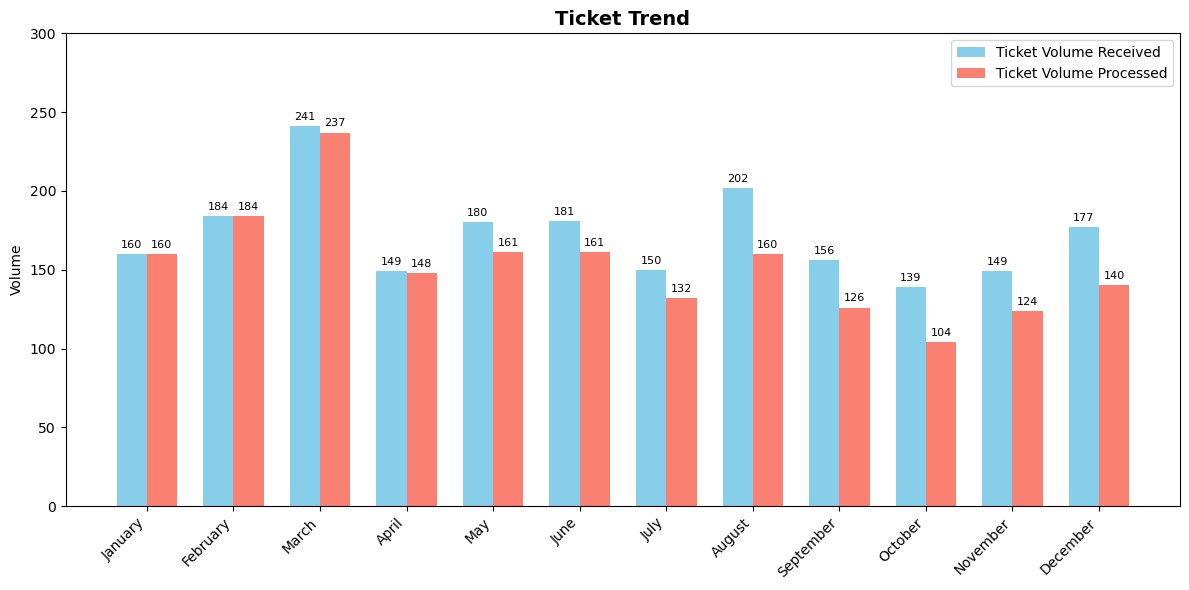

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the figure
months = ['January', 'February', 'March', 'April', 'May', 'June',
          'July', 'August', 'September', 'October', 'November', 'December']
received = [160, 184, 241, 149, 180, 181, 150, 202, 156, 139, 149, 177]
processed = [160, 184, 237, 148, 161, 161, 132, 160, 126, 104, 124, 140]

x = np.arange(len(months))
width = 0.35

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width/2, received, width, label='Ticket Volume Received', color='skyblue')
bars2 = ax.bar(x + width/2, processed, width, label='Ticket Volume Processed', color='salmon')

# Title and axes
ax.set_title('Ticket Trend', fontsize=14, fontweight='bold')
ax.set_ylabel('Volume')
ax.set_xticks(x)
ax.set_xticklabels(months, rotation=45, ha='right')
ax.set_ylim(0, 300)
ax.legend()

# Add value labels
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.savefig("ticket_trend_before.png", dpi=300)
plt.show()
